## 提出问题

影响乘客生还的因素很多，这里只对乘客的性别、年龄、乘客等级、这三个因素感兴趣，
看看这四个因素是否会影响乘客的生还率。

    1.性别是否会影响生还率
    2.年龄是否会影响生还率
    3.乘客等级会否会影响乘客率
    4.性别和舱位共同对生还率的影响
    5.年纪和性别共同对生还率的影响
    6.年纪和等级共同对生还率的影响

这里:乘客的性别、年龄、等级、是三个自变量，生还率是因变量


In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

# 中文设置
plt.rcParams['font.sans-serif'] = ["SimHei"]


In [13]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 熟悉数据
- PassengerId:乘客ID
- Survived:是否获救，用1和Rescued表示获救,用0或者not saved表示没有获救
- Pclass:乘客等级，“1”表示Upper，“2”表示Middle，“3”表示Lower
- Name:乘客姓名
- Sex:性别
- Age:年龄
- SibSp:乘客在船上的配偶数量或兄弟姐妹数量）
- Parch:乘客在船上的父母或子女数量
- Ticket:船票信息
- Fare:票价
- Cabin:是否住在独立的房间，“1”表示是，“0”为否
- embarked:表示乘客上船的码头距离泰坦尼克出发码头的距离，数值越大表示距离越远

#### 1.查看各字段的数据类型

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. 查看数据的摘要信息

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从数据摘要中可以看出。乘客的生还率大约在38%，超越50的乘客在3等级，乘客的平均年龄在30岁左右，普遍比较年轻

#### 3. 数据清洗和处理缺失值
- Embarked有非常少的两个缺失值
- 处理Age的缺失值

In [ ]:
# Embarked有非常少的两个缺失值，这里用'S'填充
df['Embarked']=df['Embarked'].fillna('S')

In [14]:
#处理Age的缺失值，Age是连续数据，这里用平均值填充缺失值
age_mean=df['Age'].mean()
df['Age']=df['Age'].fillna(age_mean)

#### 4.处理性别数据

- 这里把性别数据值字符串不便于计算换成数值，
- 用1代表男性，用0代表女性，将性别数值化

In [5]:

def sex_value(Sex):
    if Sex=='male':
        return 1
    else:
        return 0

df['Sex'].apply(sex_value)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [15]:
df['Sex'] = df['Sex'].map({"male":1, "female":0})
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 5. 获取生还乘客的数据

In [16]:
survives_passenger_df=df[df['Survived']==1]

survives_passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


#### 6.性别对生还率的影响

In [17]:
# 获取生还者的性别信息
df_sex1=df['Sex'][df['Survived']==1]
df_sex1
# 数据中只有2中值, 0 ---女性  1--男性

1      0
2      0
3      0
8      0
9      0
      ..
875    0
879    0
880    0
887    0
889    1
Name: Sex, Length: 342, dtype: int64

In [20]:
# 获取遇难者性别数据
df_sex0=df['Sex'][df['Survived']==0]
df_sex0

0      1
4      1
5      1
6      1
7      1
      ..
884    1
885    0
886    1
888    0
890    1
Name: Sex, Length: 549, dtype: int64

#### 使用直方图展示图形:
用一系列宽度相等、高度不等的长方形来表示数据，其宽度代表组距，高度代表指定组距内的数据数（频数）


([<matplotlib.axis.XTick at 0x19c50704048>,
 <a list of 4 Text xticklabel objects>)

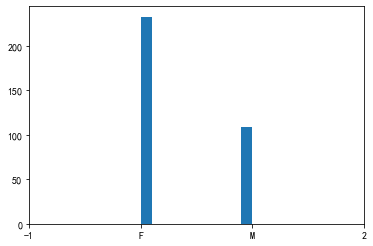

In [24]:
# 生还者性别
plt.hist(df_sex1)
plt.xticks([-1,0,1,2],[-1,'F','M',2])

([<matplotlib.axis.XTick at 0x19c5076c788>,
 <a list of 4 Text xticklabel objects>)

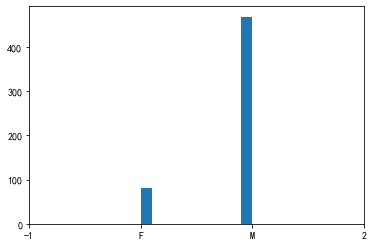

In [25]:
# 遇难者的性别
plt.hist(df_sex0)
plt.xticks([-1,0,1,2],[-1,'F','M',2])

Text(0.5, 1.0, 'Sex_Survived')

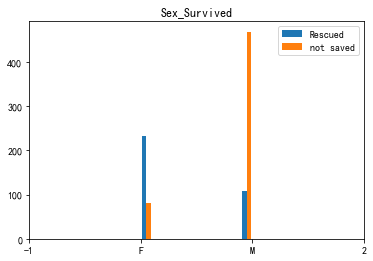

In [26]:
df_sex1=df['Sex'][df['Survived']==1]
df_sex0=df['Sex'][df['Survived']==0]

# 绘制直方图
plt.hist([df_sex1,df_sex0],
        label=['Rescued','not saved'])
#stacked=True,
# 处理x坐标
plt.xticks([-1,0,1,2],[-1,'F','M',2])
# 展示图例
plt.legend()
# 设置title
plt.title('Sex_Survived')

> 看出全体乘客中男性占了大部分，但是生还乘客中女性占了大部分；

    得出结论：女性的生还概率比男性的更高


#### 7. 乘客等级对生还率的影响

Text(0.5, 1.0, 'Pclass_Survived')

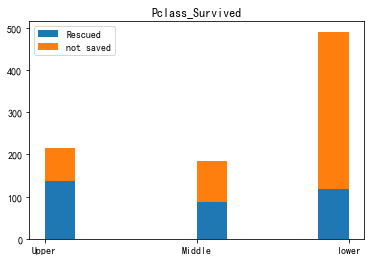

In [27]:
#不同等级对生还率的影响
# 生还等级数据
df_pclass1=df['Pclass'][df['Survived']==1]
# 遇难等级数据
df_pclass0=df['Pclass'][df['Survived']==0]



plt.hist([df_pclass1,df_pclass0],
        stacked=True,
        label=['Rescued','not saved'])
plt.xticks([1,2,3],['Upper','Middle','lower'])
plt.legend()
plt.title('Pclass_Survived')

> 全体乘客中lower等级的乘客超过了一半，生还乘客中upper等级的人最多，
  对比各个等级的死亡人数和生还人数：

    可以得出结论：Upper等级生还概率大于Middle、lower的生存概率，等级越好生还概率越好


#### 8. 年龄对生还率的影响

Text(0.5, 1.0, 'Age_Survived')

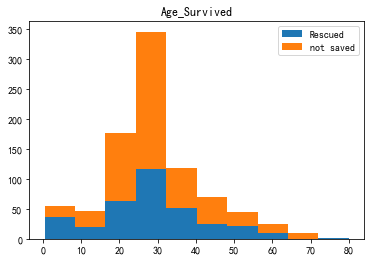

In [28]:
df_age1=df['Age'][df['Survived']==1]
df_age0=df['Age'][df['Survived']==0]

plt.hist([df_age1,df_age0],
        stacked=True,
        label=['Rescued','not saved'])
#plt.xticks([1,2,3],['Upper','Middle','lower'])
plt.legend()
plt.title('title')
plt.title('Age_Survived')

In [29]:
#不同年龄段对生还率的影响elderly，child,youth
#年龄数据进行处理，0-18为child(少年)，18-40为youth（青年），40-80为elderly（老年）
def age_duan(age):
    print(age)
    if age<=18:
        return 1
    elif age<=40:
        return 2
    else:
        return 3
    
df['Age']=df['Age'].apply(age_duan)
df['Age']

22.0
38.0
26.0
35.0
35.0
29.69911764705882
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
29.69911764705882
31.0
29.69911764705882
35.0
34.0
15.0
28.0
8.0
38.0
29.69911764705882
19.0
29.69911764705882
29.69911764705882
40.0
29.69911764705882
29.69911764705882
66.0
28.0
42.0
29.69911764705882
21.0
18.0
14.0
40.0
27.0
29.69911764705882
3.0
19.0
29.69911764705882
29.69911764705882
29.69911764705882
29.69911764705882
18.0
7.0
21.0
49.0
29.0
65.0
29.69911764705882
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
29.69911764705882
29.69911764705882
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
29.69911764705882
29.69911764705882
0.83
30.0
22.0
29.0
29.69911764705882
28.0
17.0
33.0
16.0
29.69911764705882
23.0
24.0
29.0
20.0
46.0
26.0
59.0
29.69911764705882
71.0
23.0
34.0
34.0
28.0
29.69911764705882
21.0
33.0
37.0
28.0
21.0
29.69911764705882
38.0
29.69911764705882
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
29.69911764705882
32.5
32.5
54.0
12.0
29.69911764705882
24.0
29.69911764705882


0      2
1      2
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    2
890    2
Name: Age, Length: 891, dtype: int64

Text(0.5, 1.0, 'Age_Survived')

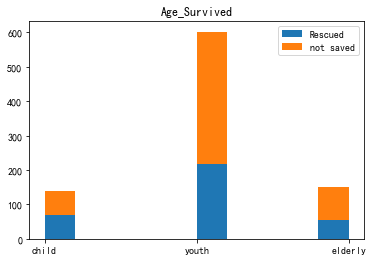

In [30]:
df_sex1=df['Age'][df['Survived']==1]
df_sex0=df['Age'][df['Survived']==0]


plt.hist([df_sex1,df_sex0],
        stacked=True,
        label=['Rescued','not saved'])

plt.xticks([1,2,3],['child','youth','elderly'])
plt.legend()
plt.title('Age_Survived')

> 全部乘客中大部分人否在30岁左右，而0-10的生还率比其他年龄段都要高

    结论：0-10岁的生还率率最高，20-40之间的生还人数最多


#### 9.性别和乘客等级共同对生还率的影响

In [43]:
# 按照 性别和等级 对乘客进行分组. count
df.groupby(['Sex','Pclass']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex Pclass                                                                 
0   1                94        94    94   94     94     94      94    94   
    2                76        76    76   76     76     76      76    76   
    3               144       144   144  144    144    144     144   144   
1   1               122       122   122  122    122    122     122   122   
    2               108       108   108  108    108    108     108   108   
    3               347       347   347  347    347    347     347   347   

            Cabin  Embarked  
Sex Pclass                   
0   1          81        92  
    2          10        76  
    3           6       144  
1   1          95       122  
    2           6       108  
    3           6       347

In [47]:
# ['Sex','Pclass']
def my_group(df,cols)
    #['Sex','Pclass'] --- >cols  ['Sex'] -- [cols[0]]
    return df.groupby(cols)[cols[0]].count()

Sex  Pclass
0    1          94
     2          76
     3         144
1    1         122
     2         108
     3         347
Name: Sex, dtype: int64

In [32]:
# 随便取出一列
df.groupby(['Sex','Pclass']).count()['PassengerId']

Sex  Pclass
0    1          94
     2          76
     3         144
1    1         122
     2         108
     3         347
Name: PassengerId, dtype: int64

In [35]:
#按照性别和乘客等级对乘客进行分组后 ，每个组的人数
group_all = df.groupby(['Sex','Pclass']).count()['PassengerId']

# 计算生还者中每组数据
survives_passenger_df=df[df['Survived']==1]
# 对生还者进行统计操作
survives_passenger_group = survives_passenger_df.groupby(['Sex','Pclass']).count()['PassengerId']

# 每组生还者的比率
survives_passenger_radio = survives_passenger_group/group_all

survives_passenger_radio

Sex  Pclass
0    1         0.968085
     2         0.921053
     3         0.500000
1    1         0.368852
     2         0.157407
     3         0.135447
Name: PassengerId, dtype: float64

Rectangle(xy=(-0.25, 0), width=0.5, height=0.968085, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=0.921053, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=0.5, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=0.368852, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=0.157407, angle=0)
Rectangle(xy=(4.75, 0), width=0.5, height=0.135447, angle=0)


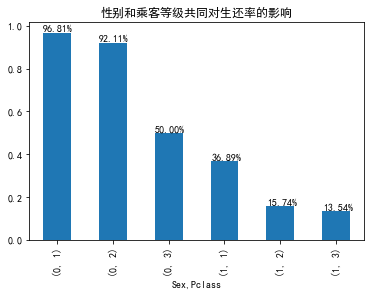

In [39]:
# 绘制图形
bar=survives_passenger_radio.plot.bar(title="性别和乘客等级共同对生还率的影响")
for p in bar.patches:
    print(p)
    bar.text(p.get_x()*1.005, p.get_height()*1.005,'%.2f%%'%(p.get_height()*100))

> 可以看到，对生还率的影响性别>乘客等级，其次是乘客等及对生还率的影响是1>2>3等

#### 10. 性别和年龄对生还率的影响

In [49]:
#统计列生还人数和所有人数比率
def passenger_survived_ratio(data,cols):
    # 所有乘客信息
    passenger_info=data[cols]
    passenger_group = passenger_info.groupby(cols)[cols[0]].count()
    # 生还者信息
    surived_info=data[cols][data['Survived']==1]
    surived_group = surived_info.groupby(cols)[cols[0]].count()
    return surived_group/passenger_group

#输出柱状图
def print_bar(data,title=""):
    bar=data.plot.bar(title=title)
    for p in bar.patches:
        bar.text(p.get_x()*1.005 ,p.get_height()*1.005, '%.2f%%'%(p.get_height()*100))

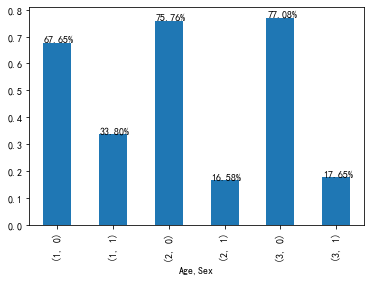

In [50]:
print_bar(passenger_survived_ratio(df,['Age','Sex']))

可以看出，对生还率影响大的是性别，女性>男性

其次少年的生还率大于青年和老年，青年跟老年的对生还率差不多

年龄和乘客等级共同对生还率的影响

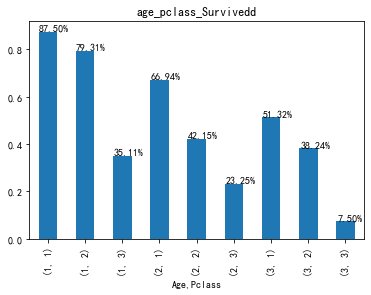

In [51]:
#Age中用1表示少年,用2表示青年,用3表示老年
print_bar(passenger_survived_ratio(df,['Age','Pclass']), "age_pclass_Survivedd")

可以看出乘客的等级对生还率的影响>乘客年龄的影响

年龄越大生还率越小，乘客等级越差生还率越差

### 结论

通过分析，可以看出对生还率影响最大的因素是乘客等级，其次是性别，最后年龄段也对生化率有影响
### 分析的局限性

    这里并没有从统计上分析得出这些结果的偶然性，所以并不知道这里的结果是真正的差异造成的还是噪音造成的
    年龄字段有一些缺失值，因为是连续数据这里用的是全体乘客年龄的均值填充缺失值，这样会缩小年龄之间的差异，也会影响分析结果

### 结果的相关性

这里的数据并非通过试验得出，所以无法说自变量之间的因果性，只能说她们之间有相关性
